Number of local maxima found are 2


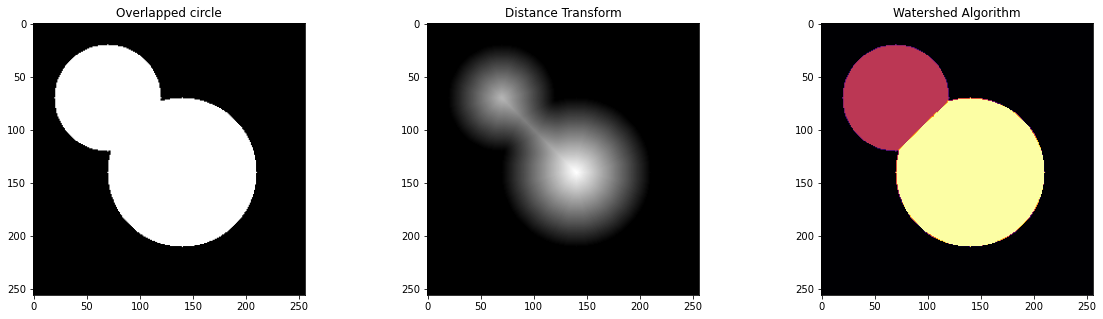

In [4]:
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from scipy import ndimage as ndi
import cv2
import numpy as np
from matplotlib import pyplot as plt

#Create an overlapped circle
img = np.zeros((256,256), dtype='uint8')
cv2.circle(img, (70,70), 50, (255,255,255), -1)
cv2.circle(img, (140,140), 70, (255,255,255), -1)

#Apply distance transform algorithm
dist_transform = cv2.distanceTransform(img, cv2.DIST_L2, 5)

#Find local maxima
local_max = peak_local_max(dist_transform, min_distance=1, indices=False)

#Labeling the local maxima
s = np.ones((3,3))
(markers, features) = ndi.label(local_max, structure=s)
print('Number of local maxima found are {}'.format(features))

#Apply Watershed algorithm
segmented = watershed(-dist_transform, markers, mask=img)

#Show image
fig1 = plt.figure(figsize=(20,5))
ax1 = fig1.add_subplot(1,3,1)
ax1.set_title('Overlapped circle')
ax1.imshow(img, cmap='gray')
ax2 = fig1.add_subplot(1,3,2)
ax2.set_title('Distance Transform')
ax2.imshow(dist_transform, cmap='gray')
ax3 = fig1.add_subplot(1,3,3)
ax3.set_title('Watershed Algorithm')
ax3.imshow(segmented, cmap='inferno')